# import libraries

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import sys
from global_land_mask import globe
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
import pandas as pd
import utils_v1v2 as v1v2
import os

import matplotlib as mpl
mpl.rcParams['font.size'] = 14
mpl.rcParams['xtick.labelsize'] = 15
mpl.rcParams['ytick.labelsize'] = 15
mpl.rcParams['axes.labelsize'] = 15
mpl.rcParams["legend.handlelength"] = 1.0
mpl.rcParams["legend.frameon"] = True

workdir = '/home/qin4/From_Compy/home_dir/'
datadir0 = '/p/user_pub/climate_work/qin4/From_Compy/compyfs_dir/'
figdir = workdir+'/scripts/published/figure/'

# fixed parameters 
dt = 1800 # time step unit: s
cpair = 1.00464e3 #J/(kg K)
rho_w = 1000 # kg/m3
gravit = 9.8 # m/s2

from datetime import date
today = date.today()
dd = today.strftime("%Y-%m-%d")
print(dd)

2023-10-04


# [Figure 3 and 7] do fixed regime-partitioning with ensemble mean states
> Figure 3a: tag = 'gradual'

> Figure 3b: tag = 'single'

> Figure 7: tag = 'MG_single'

## define cases

In [2]:

tab20c = v1v2.get_color('tab20',20)

# tag = 'gradual' 
# tag = 'MG_single'
# tag = 'single'
# tag = 'test'
tag = 'MG_revision'

v1c = 'tab:grey'
v1Allc = tab20c[6]
gwc = tab20c[7]
trigc = tab20c[5]
ullc = 'forestgreen'
gustc = tab20c[4]
ZMc = tab20c[3]
MGc = tab20c[2]
clubbc = tab20c[1]
v2c = tab20c[0] 

MG_Bergc = tab20c[9]
MG_mincdncc = tab20c[11]
MG_accrec = tab20c[13]
MG_autoc = tab20c[15]
MG_wsubc = tab20c[17]

if tag == 'test':
    case_stamp = [
        'v2.OutTend',\
    ]
    case_stamp_out = [
        'v2',
    ]
    colors = [
        v2c, 
    ]
    
if tag == 'gradual':
    #========================================================
    case_stamp = [\
    'v1', \
    'v1.All',\
    'v2.bk.clubb.MG.ZM.gust.trig.gw',\
    'v2.bk.clubb.MG.ZM.gust.trig',\
    'v2.bk.clubb.MG.ZM.gust',\
    'v2.bk.clubb.MG.ZM',\
    'v2.bk.clubb.MG',\
    'v2.bk.clubb',\
    'v2.OutTend',\
    ]

    case_stamp_out = [
    'v1', \
    'v2.v1(All)',\
    'v2.v1(clubb.MG.ZMother.gust.ZMtrig.gw)',\
    'v2.v1(clubb.MG.ZMother.gust.ZMtrig)',\
    'v2.v1(clubb.MG.ZMother.gust)',\
    'v2.v1(clubb.MG.ZMother)',\
    'v2.v1(clubb.MG)',\
    'v2.v1(clubb)',\
    'v2',\
    ]
    
    colors = [
        v1c,
        v1Allc,
        gwc,
        trigc,
        gustc,
        ZMc,
        MGc,
        clubbc,
        v2c
    ]
    

elif tag == 'single':
    #========================================================
    case_stamp = [
    'v1', 
    'v1.All',
    'v2.bk.trig',
    'v2.bk.trig_ull',  
    'v2.bk.MG',
    'v2.bk.ZM',
    'v2.bk.clubb',
    'v2.OutTend',
    ]

    case_stamp_out = [
    'v1', 
    'v2.v1(All)',\
    'v2.v1(ZMtrig)',\
    'v2.v1(ZMtrig_ULL)',\
    'v2.v1(MG)',\
    'v2.v1(ZMother)',\
    'v2.v1(clubb)',\
    'v2',\
    ]
    
    colors = [
        v1c, 
        v1Allc,
        trigc, 
        ullc,
        MGc,
        ZMc,
        clubbc,
        v2c
    ]

elif tag == 'MG_single':
    #========================================================
    case_stamp = [\
    'v2.bk.MG',\
    'v2.bk.MG_Berg',\
    'v2.bk.MG_mincdnc',\
    'v2.bk.MG_accre',\
    'v2.bk.MG_auto',\
    'v2.bk.MG_wsub',\
    'v2.OutTend',\
    ]
    
    case_stamp_out = [\
    'v2.v1(MG)',\
    'v2.v1(MG_WBF)',\
    'v2.v1(MG_mincdnc)',\
    'v2.v1(MG_accre)',\
    'v2.v1(MG_auto)',\
    'v2.v1(MG_wsub)',\
    'v2',\
    ]
    
    colors = [\
    MGc,
    MG_Bergc,
    MG_mincdncc,
    MG_accrec, 
    MG_autoc, 
    MG_wsubc,
    v2c,
    ]
    
elif tag == 'MG_revision':
    #========================================================
    case_stamp = [
        'v2.bk.MG_auto',
        'v2.OutTend',
        'nomincdnc.prc_exp1_v1', 
        'nomincdnc',
    ]
    
    case_stamp_out = [
        'v2.v1(MG_auto)',
        'v2',
        'v2.v1(MG_mincdnc).prc_exp1', 
        'v2.v1(MG_mincdnc)',
    ]
    
    colors = [
        MG_autoc,
        v2c,
        MG_autoc, 
        MG_mincdncc,
    ]

print(case_stamp)
print(len(case_stamp),len(case_stamp_out),colors)

['v2.bk.MG_auto', 'v2.OutTend', 'nomincdnc.prc_exp1_v1', 'nomincdnc']
4 4 [(0.7803921568627451, 0.7803921568627451, 0.7803921568627451, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.7803921568627451, 0.7803921568627451, 0.7803921568627451, 1.0), (0.7686274509803922, 0.611764705882353, 0.5803921568627451, 1.0)]


## read OMEGA and get ensemble mean of all cases

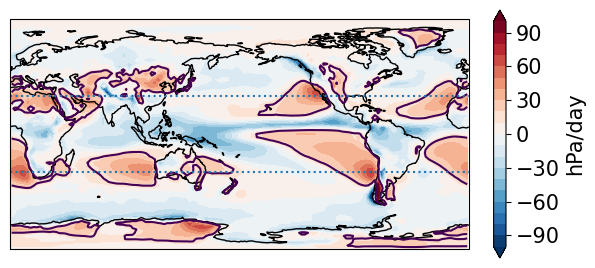

In [3]:
fomega = 'omega700_mm.nc'

if os.path.isfile(fomega): 
    ff = xr.open_dataset(fomega)
    omega700_pi_mm  = ff['omega700_pi_mm']
    omega700_ab_mm  = ff['omega700_ab_mm']
    omega700_avg_mm = ff['omega700_avg_mm']
    ff.close()
else: 
    Vars = ['OMEGA700']
    dicr = {}
    for case in case_stamp:

        dicr[case] = {}
        for var in Vars:
            # ============= read data ==================================
            datadir = workdir+'diag_feedback_E3SM/data/'
            fname = 'global_'+var+'_'+case+'.nc'

            f = xr.open_dataset(datadir+fname)
            data1 = f[var+'_pi_clim']
            data2 = f[var+'_ab_clim']
            f.close()

            # ensure the lat and lon names 
            latnew, lonnew = list(data1.coords.keys())[0], list(data1.coords.keys())[1]
            data1 = data1.rename({lonnew: 'lon',latnew: 'lat'})

            latnew, lonnew = list(data2.coords.keys())[0], list(data2.coords.keys())[1]
            data2 = data2.rename({lonnew: 'lon',latnew: 'lat'})

            if var == 'OMEGA700':
                scale = 864.
            else:
                scale = 1.0 
            dicr[case][var+'_pi'] = data1*scale
            dicr[case][var+'_ab'] = data2*scale  
            dicr[case][var+'_avg'] = (data1*scale+data2*scale)/2. 

    # =========== get ensemble mean
    omega700_pi_mm = xr.concat([dicr[case]['OMEGA700_pi'] for case in dicr.keys()],dim="case_dim").mean(axis=0)
    omega700_ab_mm = xr.concat([dicr[case]['OMEGA700_ab'] for case in dicr.keys()],dim="case_dim").mean(axis=0)
    omega700_avg_mm = xr.concat([dicr[case]['OMEGA700_avg'] for case in dicr.keys()],dim="case_dim").mean(axis=0)

    print(omega700_pi_mm.shape)

    # save to NC file 
    # ------------------------------------------------
    dicout = {}
    dicout['omega700_pi_mm'] = omega700_pi_mm
    dicout['omega700_ab_mm'] = omega700_ab_mm
    dicout['omega700_avg_mm'] = omega700_avg_mm

    save_big_dataset(dicout,'omega700_mm.nc')


# =========== check spatial map 
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree(180.))

datap = omega700_pi_mm 

im = ax.contourf(datap.lon,datap.lat,datap,transform=ccrs.PlateCarree(),
                cmap='RdBu_r',
                levels=np.arange(-100,110,10),
                extend='both')

ax.contour(datap.lon,datap.lat,datap,transform=ccrs.PlateCarree(),
           levels=[15])
ax.coastlines()
ax.set_global()

fig.colorbar(im,fraction=0.025,label='hPa/day')

ax.axhline(y=30,ls=':')
ax.axhline(y=-30,ls=':')

## read data and do partitioning

In [4]:
what_state = 'avgCTLP4K' # 'CTL','P4K','avgCTLP4K'

v2.bk.MG_auto netCRE_ano_grd_adj
TropMarineLow pi_avg= 0.2148664454626223 ab_avg= 0.2094856297112562 avg_avg= 0.21253202171115132 cum pi_avg= 0.2148664454626223 cum ab_avg= 0.2094856297112562 cum avg_avg= 0.21253202171115132
TropAscent pi_avg= 0.15813508855610103 ab_avg= 0.16351590430746715 avg_avg= 0.160469512307572 cum pi_avg= 0.3730015340187233 cum ab_avg= 0.3730015340187234 cum avg_avg= 0.3730015340187233
TropLand pi_avg= 0.12700013378939662 ab_avg= 0.12700013378939662 avg_avg= 0.12700013378939662 cum pi_avg= 0.5000016678081199 cum ab_avg= 0.50000166780812 cum avg_avg= 0.5000016678081199
MidLat pi_avg= 0.3660302057256306 ab_avg= 0.3660302057256306 avg_avg= 0.3660302057256306 cum pi_avg= 0.8660318735337506 cum ab_avg= 0.8660318735337507 cum avg_avg= 0.8660318735337506
HiLat pi_avg= 0.13397636878960215 ab_avg= 0.13397636878960215 avg_avg= 0.13397636878960215 cum pi_avg= 1.0000082423233527 cum ab_avg= 1.0000082423233527 cum avg_avg= 1.0000082423233527
Global pi_avg= 1.0000131415087483

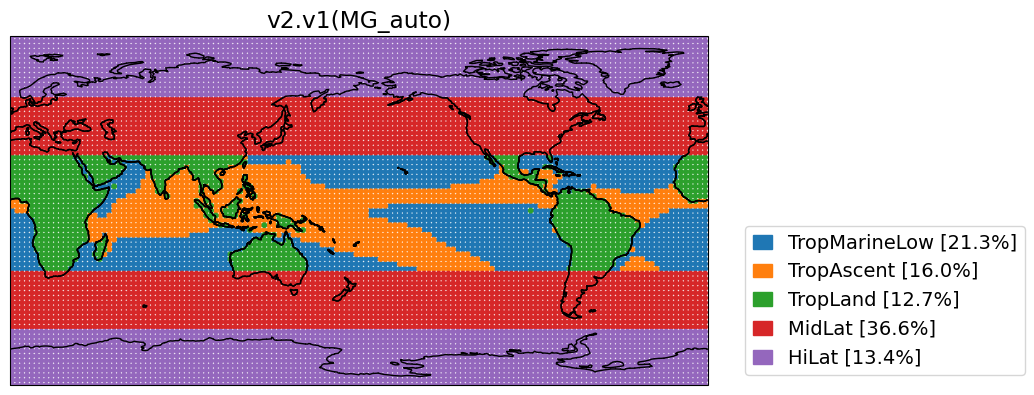

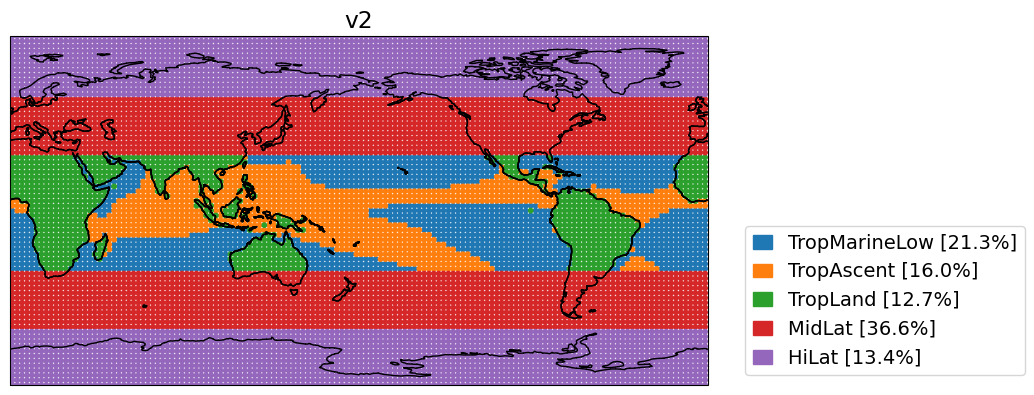

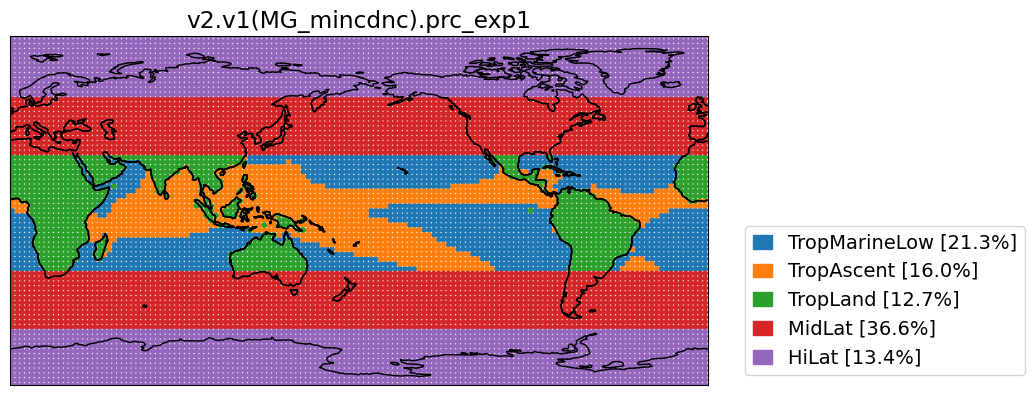

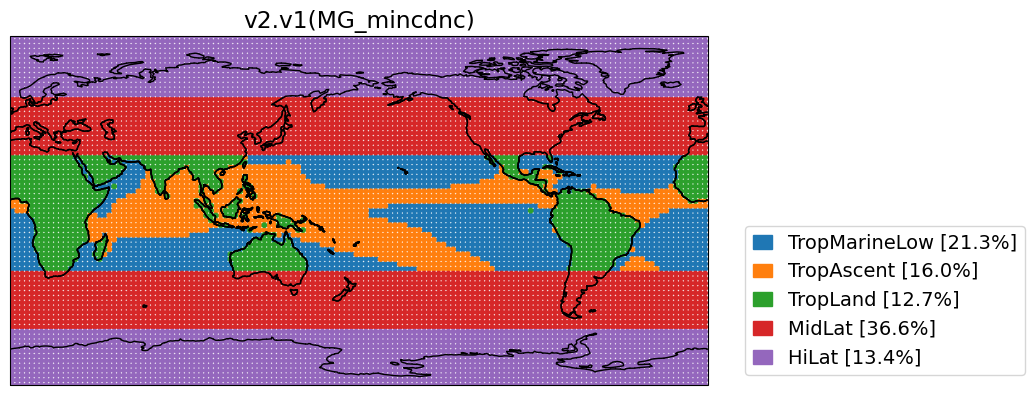

In [6]:
regimes = ['TropMarineLow','TropAscent','TropLand','MidLat','HiLat','Global']
colorsh = v1v2.get_color('tab10',len(regimes))

dics1 = {}
for case,case_out in zip(case_stamp,case_stamp_out):
    # ============= read data ==================================
    if 'nomincdnc' in case: 
        datadir = workdir+'diag_feedback_E3SM/data/2010to2014/'
    else: 
        datadir = workdir+'diag_feedback_E3SM/data/'
    
    fname = 'lat-lon-gfdbk-CMIP6-'+case+'.nc'
    
    f1 = xr.open_dataset(datadir+fname)
   
    Vars = [
            'netCRE_ano_grd_adj',
            ]
    
    dics1[case] = {}
    for svar in Vars: 
        data = f1[svar]
        print(case, svar)
        
        # get OMEGA700
        omega700_pi = omega700_pi_mm  
        omega700_ab = omega700_ab_mm
        omega700_avg = omega700_avg_mm
        
        regsum_pi = 0
        regsum_ab = 0 
        regsum_avg = 0 
        dics1[case][svar] = {}
        
        frac_map = np.zeros((omega700_avg.shape))
        for ireg,reg in enumerate(regimes):
            ## do regime partitioning 
            data2_pi,data2_ab,data2_avg,data2m_pi,data2m_ab,data2m_avg,_ \
            = v1v2.regime_partitioning(reg,omega700_pi,omega700_ab,omega700_avg,data)
            
            # ================ fractional area ============================         
            # check fractional area to ensure the sum equals to 1. 
            regsum_pi += v1v2.area_averager(data2m_pi).values
            regsum_ab += v1v2.area_averager(data2m_ab).values
            regsum_avg += v1v2.area_averager(data2m_avg).values
            
            print(reg, 
                  'pi_avg=',v1v2.area_averager(data2m_pi).values, 
                  'ab_avg=',v1v2.area_averager(data2m_ab).values, 
                  'avg_avg=',v1v2.area_averager(data2m_avg).values,
                  'cum pi_avg=',regsum_pi, 'cum ab_avg=',regsum_ab, 'cum avg_avg=',regsum_avg)
              
            dics1[case][svar][reg+'_pi'] = xr.where(np.isnan(data2_pi),0.0,data2_pi) 
            dics1[case][svar][reg+'_ab'] = xr.where(np.isnan(data2_ab),0.0,data2_ab)
            dics1[case][svar][reg+'_avg'] = xr.where(np.isnan(data2_avg),0.0,data2_avg)
            dics1[case][svar][reg+'_cmb'] = xr.where((~np.isnan(data2_pi))&(~np.isnan(data2_ab)),data2_pi,0.0)
            dics1[case][svar][reg+'_frc_pi'] = data2m_pi
            dics1[case][svar][reg+'_frc_ab'] = data2m_ab
            dics1[case][svar][reg+'_frc_avg'] = data2m_avg
            
            if reg != 'Global':
                frac_map = xr.where(data2m_avg==0,frac_map,ireg)
            
        print()
        
        if tag == 'test': 
            fig = plt.figure()
            ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree(180))
            lons,lats = data2m_avg.lon,data2m_avg.lat
            # ax.contour(lons,lats,frac_map,transform=ccrs.PlateCarree(),colors='grey')
            im = ax.contourf(lons,lats,frac_map,transform=ccrs.PlateCarree(),levels=[0.5,1.5,2.5,3.5,4.5])
            ax.set_global()
            ax.coastlines()
            fig.colorbar(im,fraction=0.02)

            xr.Dataset({"frac_map":frac_map}).to_netcdf(figdir+'saved_frac_map_'+dd+'.nc')
            print('Saved frac_map.nc')
            print() 
            sys.exit()
        
        # ========== plot regime map =================================
        fig = plt.figure(figsize=(9,5))
        ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree(180))
        ax.set_title(case_out)
        
        ii = 0 
        patches = [] # for legend
        checksum = 0
        transitionsum = 0 
        for reg in regimes[:-1]: # ignore Global
            reg1 = reg+'_frc_pi'
            reg2 = reg+'_frc_ab'
            reg3 = reg+'_frc_avg'
            
            datap1_avg = v1v2.area_averager(dics1[case][svar][reg1]).values*100.
            datap2_avg = v1v2.area_averager(dics1[case][svar][reg2]).values*100.
            datap3_avg = v1v2.area_averager(dics1[case][svar][reg3]).values*100.
            # mask zero by nan 
            datap1 = xr.where(dics1[case][svar][reg1]==0,np.nan,1.0) 
            datap2 = xr.where(dics1[case][svar][reg2]==0,np.nan,1.0)
            datap3 = xr.where(dics1[case][svar][reg3]==0,np.nan,1.0)
            
            if what_state != 'avgCTLP4K':
                datap = xr.where((~np.isnan(datap1))&(~np.isnan(datap2)),1.0,0.0)
            else:
                datap = dics1[case][svar][reg3]
                
            datap_avg = v1v2.area_averager(datap).values*100. 
            
            checksum += datap_avg
            print(reg, 'avg=',datap_avg, 'cum=',checksum)
            
            lon2d,lat2d = np.meshgrid(datap1.lon,datap1.lat)
            ax.scatter(lon2d,lat2d,datap*10.0,color=colorsh[ii],transform=ccrs.PlateCarree(),
                      )
            ax.coastlines()
            ax.set_global()
            
            patch = mpatches.Patch(color=colorsh[ii], label=reg.split('_')[0]+' ['+str(datap_avg.round(1))+'%]')
            patches.append(patch)

            if what_state != 'avgCTLP4K':
                # transition regime...
                datapp = xr.where((~np.isnan(datap1))&(datap==0),1.0,0.0)
                ax.scatter(lon2d,lat2d,datapp*1.0,color='grey',transform=ccrs.PlateCarree(),
                          )
                print(v1v2.area_averager(datapp).values)
                transitionsum += v1v2.area_averager(datapp).values 
   
            ii += 1
        
        if what_state != 'avgCTLP4K':
            print(transitionsum)
            transitionsum = transitionsum *100 
            patch = mpatches.Patch(color='grey', label='transition regime'+' ['+str(transitionsum.round(1))+'%]')
            patches.append(patch)
            
        plt.legend(handles=patches,bbox_to_anchor=(1.04,0), loc='lower left')
        # sys.exit()
        
        if case == 'v2.OutTend':
            print('Figure Saved. Congrats!')
            fig.savefig(figdir+'LatLon_FixedRegimeNoEIS_regime_map_'+case+'_'+dd+'.png',dpi=300,bbox_inches='tight')
        

## plot regime-partitioning cloud feedback

vmin vmax =  -0.24000000000000002 0.325
vmin vmax =  -0.7200000000000001 0.9749999999999999
                   TropMarineLow  TropAscent  TropLand  MidLat  HiLat  Global
v1                          0.19        0.15      0.10    0.21   0.01    0.65
v2.v1(All)                  0.14        0.14      0.10    0.22   0.01    0.61
v2.v1(ZMtrig)               0.08        0.13      0.15    0.11  -0.04    0.43
v2.v1(ZMtrig_ULL)           0.01        0.15      0.12    0.20  -0.02    0.46
v2.v1(MG)                   0.07        0.18      0.15    0.29   0.01    0.69
v2.v1(ZMother)              0.05        0.09      0.12    0.21  -0.03    0.43
v2.v1(clubb)                0.03        0.17      0.15    0.18  -0.03    0.50
v2                          0.01        0.15      0.12    0.20  -0.02    0.46
/home/qin4/From_Compy/home_dir//scripts/published/figure/Barplot_FixedRegimeNoEIS_netCRE_ano_grd_adj_single_EnsembleMeanRegime_avg_2023-10-02.png


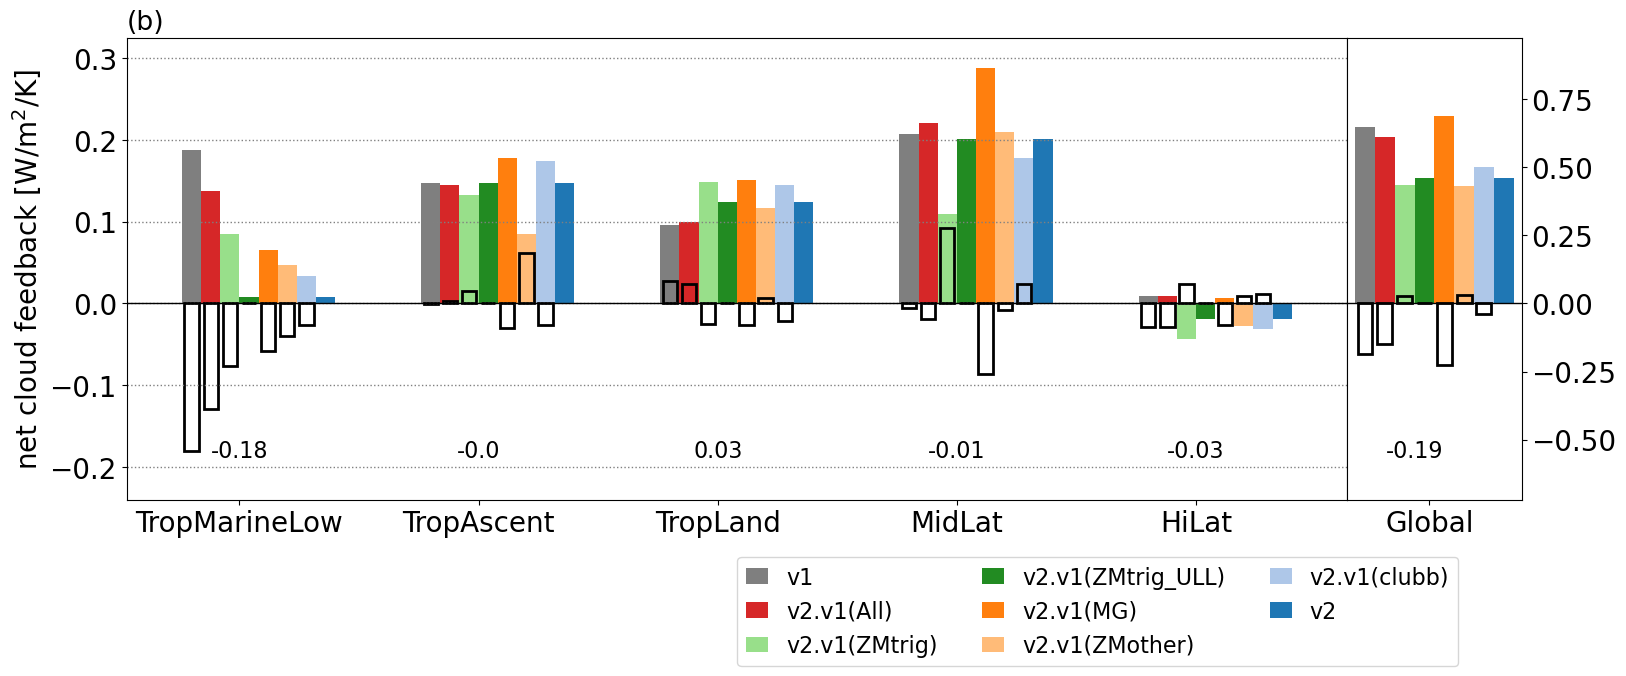

In [34]:
mpl.rcParams['font.size'] = 16
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['axes.labelsize'] = 20

for tag2 in [
            'EnsembleMeanRegime',
            ]:
    
    if tag2 == 'EnsembleMeanRegime':
        dics = dics1

    # for tag_reg in ['pi','ab','avg']:
    for tag_reg in ['avg']:
    
        # ============= plotting ==================================
        fig = plt.figure(figsize=(18,6))
        nrow = 1
        ncol = 2

        gs = fig.add_gridspec(nrow,ncol,  width_ratios=(7, 1),
                              wspace=0.0,
                              ) 

        Vars = ['netCRE_ano_grd_adj']

        for ivar,svar in enumerate(Vars):
            svar_out = svar.split('_')[0]

            ax  = fig.add_subplot(gs[0, 0])
            ax2 = fig.add_subplot(gs[0, 1])


            df = pd.DataFrame()
            for ikey,regh in enumerate(regimes):
                reg = regh+'_'+tag_reg

                ### plot the mean cloud feedbacks =======================
                count = 0 
                for icase,case in enumerate(dics.keys()):
                    case_out = case_stamp_out[icase]

                    if icase == len(dics.keys())-1:
                        case_ref0 = case
                    else:
                        if tag == 'gradual':
                            case_ref0 = case_stamp[icase+1]
                        elif tag == 'single' or tag == 'MG_single' or tag == 'MG_revision':
                            case_ref0 = case_stamp[-1]

                    data = v1v2.area_averager(dics[case][svar][reg]).values
                    data_ref = v1v2.area_averager(dics[case_ref0][svar][reg]).values
                    
                    # save into dataframe
                    df.loc[case_out,regh] = data.round(2)

                    if ikey == 0:
                        label = case_stamp_out[icase]
                    else:
                        label = '_nolegend_'

                    width = 0.4

                    if 'Global' in reg:
                        ax2.bar(ikey*5+count*width,data,width=width,label=label,facecolor=colors[icase],edgecolor='none') 
                    else:
                        ax.bar(ikey*5+count*width,data,width=width,label=label,facecolor=colors[icase],edgecolor='none') 

                    count += 1

                    # ---------------- add the text for case and case_ref ------------------
                    case_ref = list(dics.keys())[0]
                    data_ref = v1v2.area_averager(dics[case_ref][svar][reg]).values
                    if case == case_stamp[-1]:
                        # ypos = -0.25
                        if 'Global' in reg:
                            ypos = -0.18 * 3.0
                            ax2.text(ikey*5+1,ypos,np.round(data-data_ref,2),rotation=0,ha='center',va='center')
                        else:
                            ypos = -0.18 
                            ax.text(ikey*5+1,ypos,np.round(data-data_ref,2),rotation=0,ha='center',va='center')

                # ===============================================================
                ### add the difference between two adjacent bars ================
                count = 0 
                for icase,case in enumerate(dics.keys()):
                    if icase == len(dics.keys())-1:
                        case_ref0 = case
                    else:
                        if tag == 'gradual':
                            case_ref0 = case_stamp[icase+1]
                        elif tag == 'single' or tag == 'MG_single' or tag == 'MG_revision':
                            case_ref0 = case_stamp[-1]
                    
                    data = v1v2.area_averager(dics[case][svar][reg]).values
                    data_ref = v1v2.area_averager(dics[case_ref0][svar][reg]).values

                    if ikey == 0:
                        label = case_stamp_out[icase]
                    else:
                        label = '_nolegend_'

                    width = 0.4

                    if case != case_stamp[-1]: # ignore the last one
                        if tag == 'gradual':
                            xpos = ikey*5+icase*width+0.2
                        else:
                            xpos = ikey*5+count*width

                        if 'Global' in reg:
                            ax2.bar(xpos,data_ref-data,
                               width=width-0.1,label='_nolegend_',edgecolor='black',facecolor='none',lw=2)
                        else:
                            ax.bar(xpos,data_ref-data,
                               width=width-0.1,label='_nolegend_',edgecolor='black',facecolor='none',lw=2) 

                    count += 1
                 # ===============================================================

            
            # ===============================================================
            ax.legend(bbox_to_anchor=(0.30,-0.2,0.8,0.1),ncol=3)    

            if len(Vars) > 1: 
                ax.set_title('('+chr(ord('`')+(ivar+1))+') ',loc='left')
            else:
                if tag == 'single':
                    ax.set_title('(b)',loc='left')
                elif tag == 'gradual':
                    ax.set_title('(a)',loc='left')

            vmin = -0.2 + (-0.04)
            vmax = 0.3 + (0.025)
            ax.set_ylim((vmin,vmax))
            print('vmin vmax = ',vmin, vmax)

            vmin = -0.2*3 +(-0.04)*3  
            vmax = 0.3*3 + (0.025)*3
            ax2.set_ylim((vmin,vmax))
            print('vmin vmax = ',vmin, vmax)

            ax2.set_xticks([len(regimes)*5-5+1.3])
            ax2.set_xticklabels([regimes[-1]])
            ax2.axhline(y=0,ls='-',color='black',lw=1)
            ax2.yaxis.tick_right()
            # ax2.grid(axis='y',lw=1,color='grey',ls=':')

            ax.set_ylabel(svar_out.split('CRE')[0]+' cloud feedback [W/m$^2$/K]')
            ax.axhline(y=0,ls='-',color='black',lw=1)
            ax.grid(axis='y',lw=1,color='grey',ls=':')

            if tag2 == 'EnsembleMeanRegime':
                addtxt = 'ensemble mean averaged'
           
            if tag_reg == 'pi':
                title = 'Partitioning based on '+addtxt+' CTL OMEGA700'
            if tag_reg == 'ab':
                title = 'Partitioning based on '+addtxt+' P4K OMEGA700'
            if tag_reg == 'cmb':
                title = 'Partitioning based on '+addtxt+' CTL&P4K OMEGA700 [no transition regime]'
            if tag_reg == 'avg':
                # title = 'Partitioning based on '+addtxt+' OMEGA700 from CTL and P4K' 
                title = ''
            ax.set_title(title)

            if ncol == 2:
                rotation = 0 #45
            else:
                rotation = 0
            
            ax.set_xticks(range(1,len(regimes[:-1])*5,5))
            ax.set_xticklabels(regimes[:-1],rotation=rotation)

            print(df)
            # df.to_csv(figdir+'Table_RegimeAveraged_CldFbk_'+tag+'_'+tag2+'_'+tag_reg+'_'+dd+'.csv')
            
        fig.savefig(figdir+'Barplot_FixedRegimeNoEIS_'+Vars[-1]+'_'+tag+'_'+tag2+'_'+tag_reg+'_'+dd+'.png',dpi=300,bbox_inches='tight')
        fig.savefig(figdir+'Barplot_FixedRegimeNoEIS_'+Vars[-1]+'_'+tag+'_'+tag2+'_'+tag_reg+'_'+dd+'.pdf',bbox_inches='tight')

        print(figdir+'Barplot_FixedRegimeNoEIS_'+Vars[-1]+'_'+tag+'_'+tag2+'_'+tag_reg+'_'+dd+'.png') 
        # sys.exit()
        

## plot MG_revision

vmin vmax =  -0.24000000000000002 0.325
vmin vmax =  -0.7200000000000001 0.9749999999999999
                            TropMarineLow  TropAscent  TropLand  MidLat  \
v2.v1(MG_auto)                       0.04        0.15      0.14    0.21   
v2                                   0.01        0.15      0.12    0.20   
v2.v1(MG_mincdnc).prc_exp1           0.06        0.17      0.13    0.22   
v2.v1(MG_mincdnc)                    0.03        0.17      0.14    0.23   

                            HiLat  Global  
v2.v1(MG_auto)              -0.01    0.53  
v2                          -0.02    0.46  
v2.v1(MG_mincdnc).prc_exp1   0.01    0.59  
v2.v1(MG_mincdnc)           -0.00    0.57  


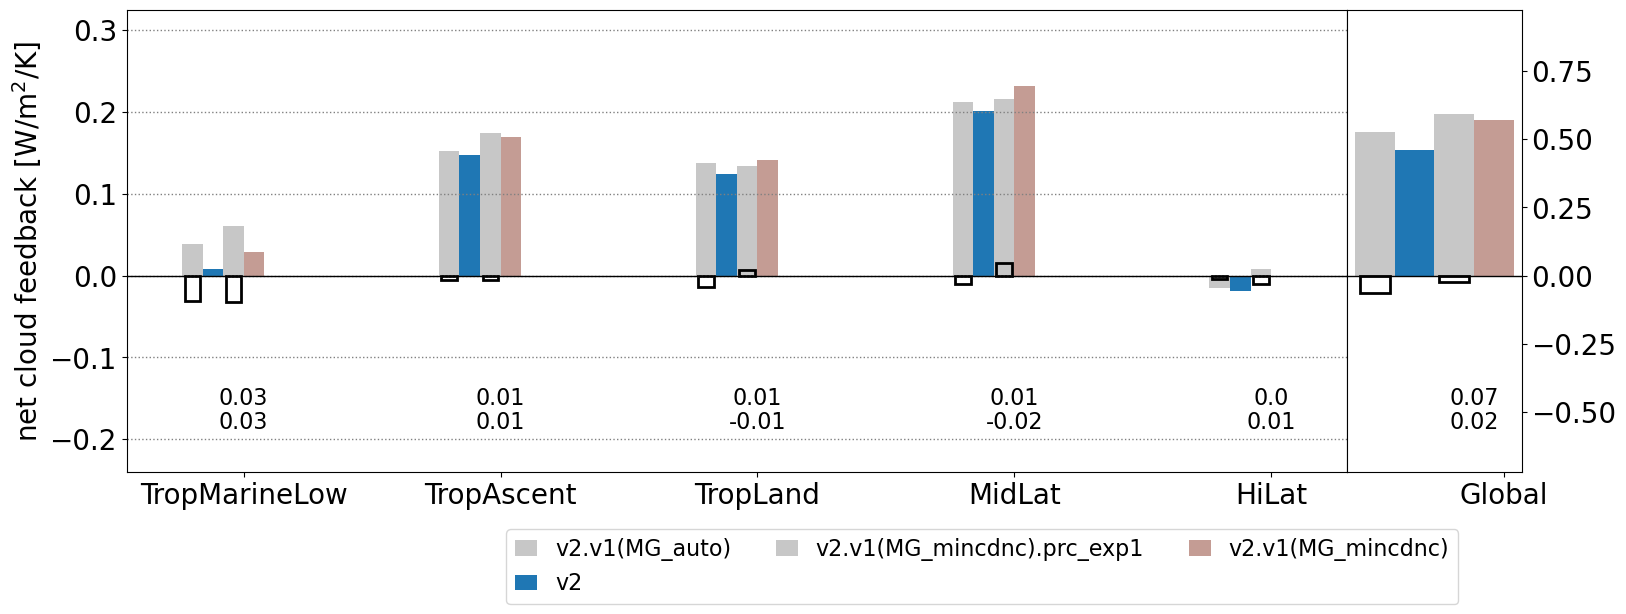

In [7]:
mpl.rcParams['font.size'] = 16
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['axes.labelsize'] = 20

for tag2 in [
            'EnsembleMeanRegime',
            ]:
    
    if tag2 == 'EnsembleMeanRegime':
        dics = dics1

    # for tag_reg in ['pi','ab','avg']:
    for tag_reg in ['avg']:
    
        # ============= plotting ==================================
        fig = plt.figure(figsize=(18,6))
        nrow = 1
        ncol = 2

        gs = fig.add_gridspec(nrow,ncol,  width_ratios=(7, 1),
                              wspace=0.0,
                              ) 

        Vars = ['netCRE_ano_grd_adj']

        for ivar,svar in enumerate(Vars):
            svar_out = svar.split('_')[0]

            ax  = fig.add_subplot(gs[0, 0])
            ax2 = fig.add_subplot(gs[0, 1])


            df = pd.DataFrame()
            for ikey,regh in enumerate(regimes):
                reg = regh+'_'+tag_reg

                ### plot the mean cloud feedbacks =======================
                count = 0 
                for icase,case in enumerate(dics.keys()):
                    case_out = case_stamp_out[icase]

                    if icase == len(dics.keys())-1:
                        case_ref0 = case
                    else:
                        if tag == 'gradual':
                            case_ref0 = case_stamp[icase+1]
                        elif tag == 'single' or tag == 'MG_single':
                            case_ref0 = case_stamp[-1]
                        elif tag == 'MG_revision':
                            if 'nomincdnc' in case: 
                                case_ref0 = case_stamp[3]
                            else: 
                                case_ref0 = case_stamp[1] 

                    data = v1v2.area_averager(dics[case][svar][reg]).values
                    data_ref = v1v2.area_averager(dics[case_ref0][svar][reg]).values
                    
                    # save into dataframe
                    df.loc[case_out,regh] = data.round(2)

                    if ikey == 0:
                        label = case_stamp_out[icase]
                    else:
                        label = '_nolegend_'

                    width = 0.4

                    if 'Global' in reg:
                        ax2.bar(ikey*5+count*width,data,width=width,label=label,facecolor=colors[icase],edgecolor='none') 
                    else:
                        ax.bar(ikey*5+count*width,data,width=width,label=label,facecolor=colors[icase],edgecolor='none') 

                    count += 1

                    # ---------------- add the text for case and case_ref ------------------
                    # case_ref = list(dics.keys())[0]
                    case_ref = case_ref0 
                    data_ref = v1v2.area_averager(dics[case_ref][svar][reg]).values
                    # if case == case_stamp[-1]:
                    if case != case_ref0: 
                        if 'Global' in reg:
                            if tag == 'MG_revision':
                                if 'nomincdnc' in case: 
                                    ypos = -0.18*3.0 
                                    ax2.text(ikey*5+1,ypos,np.round(data-data_ref,2),rotation=0,ha='center',va='center')
                                else: 
                                    ypos2 = -0.15*3.0 
                                    ax2.text(ikey*5+1,ypos2,np.round(data-data_ref,2),rotation=0,ha='center',va='center')
                            else:
                                ypos = -0.18 * 3.0
                                ax2.text(ikey*5+1,ypos,np.round(data-data_ref,2),rotation=0,ha='center',va='center') 
                        else:
                            if tag == 'MG_revision':
                                if 'nomincdnc' in case: 
                                    ypos = -0.18
                                    ax.text(ikey*5+1,ypos,np.round(data-data_ref,2),rotation=0,ha='center',va='center')
                                else: 
                                    ypos2 = -0.15 
                                    ax.text(ikey*5+1,ypos2,np.round(data-data_ref,2),rotation=0,ha='center',va='center')
                            else:
                                ypos = -0.18 
                                ax.text(ikey*5+1,ypos,np.round(data-data_ref,2),rotation=0,ha='center',va='center')

                # ===============================================================
                ### add the difference between two adjacent bars ================
                count = 0 
                for icase,case in enumerate(dics.keys()):
                    if icase == len(dics.keys())-1:
                        case_ref0 = case
                    else:
                        if tag == 'gradual':
                            case_ref0 = case_stamp[icase+1]
                        elif tag == 'single' or tag == 'MG_single':
                            case_ref0 = case_stamp[-1]
                        elif tag == 'MG_revision':
                            if 'nomincdnc' in case: 
                                case_ref0 = case_stamp[3]
                            else: 
                                case_ref0 = case_stamp[1]  

                    
                    data = v1v2.area_averager(dics[case][svar][reg]).values
                    data_ref = v1v2.area_averager(dics[case_ref0][svar][reg]).values

                    if ikey == 0:
                        label = case_stamp_out[icase]
                    else:
                        label = '_nolegend_'

                    width = 0.4

                    # if case != case_stamp[-1]: # ignore the last one
                    if case != case_ref0: # ignore the last one
                        if tag == 'gradual':
                            xpos = ikey*5+icase*width+0.2
                        else:
                            xpos = ikey*5+count*width

                        if 'Global' in reg:
                            ax2.bar(xpos,data_ref-data,
                               width=width-0.1,label='_nolegend_',edgecolor='black',facecolor='none',lw=2)
                        else:
                            ax.bar(xpos,data_ref-data,
                               width=width-0.1,label='_nolegend_',edgecolor='black',facecolor='none',lw=2) 

                    count += 1
                 # ===============================================================

            
            # ===============================================================
            ax.legend(bbox_to_anchor=(0.30,-0.2,0.8,0.1),ncol=3)    

            if len(Vars) > 1: 
                ax.set_title('('+chr(ord('`')+(ivar+1))+') ',loc='left')
            else:
                if tag == 'single':
                    ax.set_title('(b)',loc='left')
                elif tag == 'gradual':
                    ax.set_title('(a)',loc='left')

            vmin = -0.2 + (-0.04)
            vmax = 0.3 + (0.025)
            ax.set_ylim((vmin,vmax))
            print('vmin vmax = ',vmin, vmax)

            vmin = -0.2*3 +(-0.04)*3  
            vmax = 0.3*3 + (0.025)*3
            ax2.set_ylim((vmin,vmax))
            print('vmin vmax = ',vmin, vmax)

            ax2.set_xticks([len(regimes)*5-5+1.3])
            ax2.set_xticklabels([regimes[-1]])
            ax2.axhline(y=0,ls='-',color='black',lw=1)
            ax2.yaxis.tick_right()
            # ax2.grid(axis='y',lw=1,color='grey',ls=':')

            ax.set_ylabel(svar_out.split('CRE')[0]+' cloud feedback [W/m$^2$/K]')
            ax.axhline(y=0,ls='-',color='black',lw=1)
            ax.grid(axis='y',lw=1,color='grey',ls=':')

            if tag2 == 'EnsembleMeanRegime':
                addtxt = 'ensemble mean averaged'
           
            if tag_reg == 'pi':
                title = 'Partitioning based on '+addtxt+' CTL OMEGA700'
            if tag_reg == 'ab':
                title = 'Partitioning based on '+addtxt+' P4K OMEGA700'
            if tag_reg == 'cmb':
                title = 'Partitioning based on '+addtxt+' CTL&P4K OMEGA700 [no transition regime]'
            if tag_reg == 'avg':
                # title = 'Partitioning based on '+addtxt+' OMEGA700 from CTL and P4K' 
                title = ''
            ax.set_title(title)

            if ncol == 2:
                rotation = 0 #45
            else:
                rotation = 0
            
            ax.set_xticks(range(1,len(regimes[:-1])*5,5))
            ax.set_xticklabels(regimes[:-1],rotation=rotation)

            print(df)
            # df.to_csv(figdir+'Table_RegimeAveraged_CldFbk_'+tag+'_'+tag2+'_'+tag_reg+'_'+dd+'.csv')
            
        # fig.savefig(figdir+'Barplot_FixedRegimeNoEIS_'+Vars[-1]+'_'+tag+'_'+tag2+'_'+tag_reg+'_'+dd+'.png',dpi=300,bbox_inches='tight')

        # sys.exit()
        